In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [31]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")

print(df.head())

# Prints the first 5 rows

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [32]:
df.isnull().sum()

#Checks for missing values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [33]:
df.info()
df.describe()

#Gives us an overview and info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [34]:
#Total sales revenue

total_revenue = df["Total"].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

#Count (count)	Total number of non-null values in each column
#Mean (mean)	Sum of all values divided by the count
#Standard Deviation (std)	Measures how spread out the values are from the mean
#Min (min)	The smallest value in the column
#25% (Q1)	The first quartile (25% of data points are below this value)
#50% (Median) (50%)	The middle value (50% of data points are below this value)
#75% (Q3)	The third quartile (75% of data points are below this value)
#Max (max)	The largest value in the column

Total Revenue: $322966.75


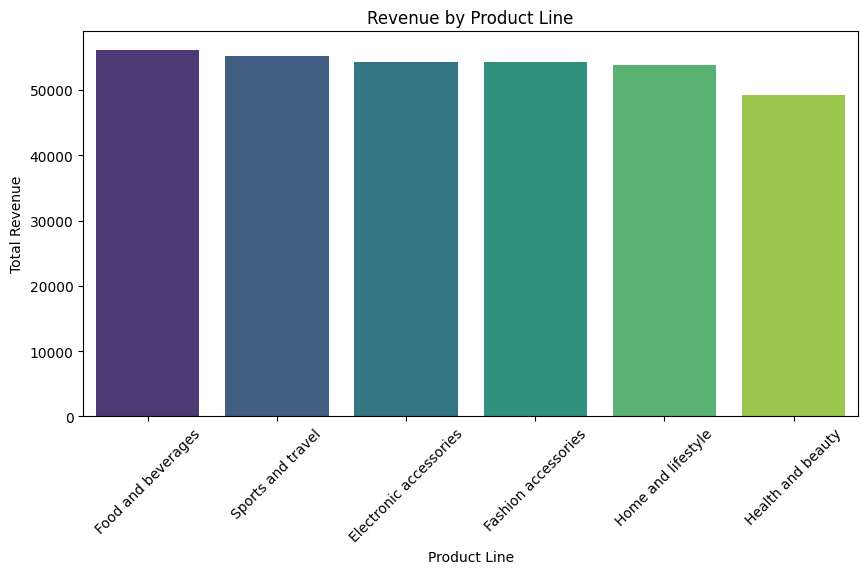

In [35]:
#Revenue by product line

sales_by_category = df.groupby("Product line")["Total"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, hue=sales_by_category.index, palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Revenue by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Revenue")
plt.show()

#Plots bar chart with y axis-Total revenue and x axis-Product line(Each product line has its own color)

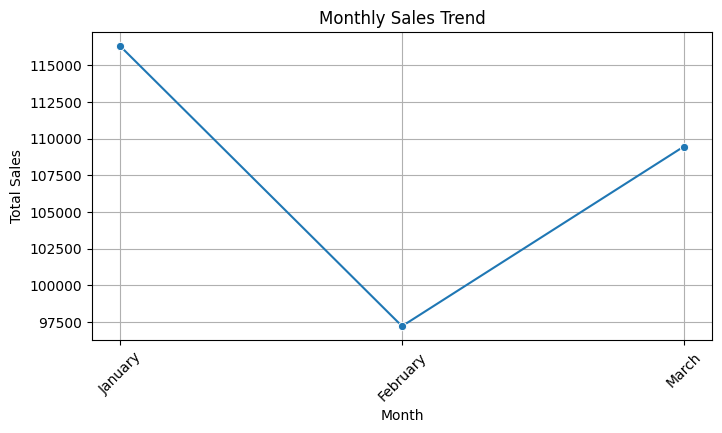

In [36]:
#Sales trends over time (From Jan 2019 to March 2019)

df["Date"] = pd.to_datetime(df["Date"])

df["Month"] = df["Date"].dt.strftime("%B") 

monthly_sales = df.groupby("Month")["Total"].sum()

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
monthly_sales = monthly_sales.reindex(month_order)

plt.figure(figsize=(8, 4))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o")

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)  
plt.grid(True)

plt.show()

#Plots a line graph with y axis-Total sales and x axis-Month

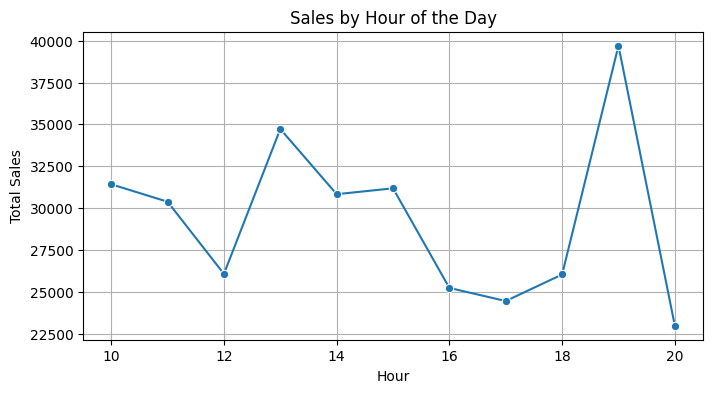

In [37]:
#Peak sales hours

df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M").dt.hour
hourly_sales = df.groupby("Hour")["Total"].sum()

plt.figure(figsize=(8, 4))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker="o")
plt.title("Sales by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

#Plots a line graph with y axis-Total sales and x axis-Hour

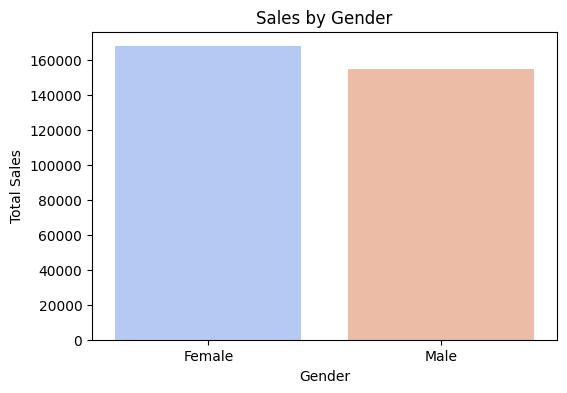

In [43]:
#Customer Purchase Behavior by Gender

gender_sales = df.groupby("Gender")["Total"].sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_sales.index, y=gender_sales.values, hue=gender_sales.index, palette="coolwarm", legend=False)
plt.title("Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.show()

#Plots a bar chat with y axis-Total sales and x axis-Gender

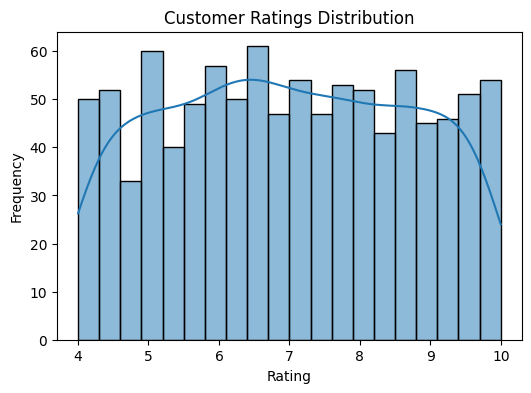

In [44]:
#Customer Ratings distribution

plt.figure(figsize=(6, 4))
sns.histplot(df["Rating"], bins=20, kde=True)
plt.title("Customer Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

#Plots a histogram that describes customer ratings distribution with y axis-Frequency and x axis-Rating